Mounted at /content/drive

Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 1

List of all stores:
Name: Apple Store, Category: Electronics, Location: 1st Floor
Name: Zara, Category: Clothing, Location: 2nd Floor
Name: Starbucks, Category: Food, Location: Ground Floor
Name: Nike, Category: Clothing, Location: 1st Floor

Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 2
Enter store name (or press enter to skip): Zara
Enter store category (or press enter to skip): 
Enter store location (or press enter to skip): 

Search results:
Name: Zara, Category: Clothing, Location: 2nd Floor

Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 3
Enter new store name: Zudio
Enter store category: Footwear
Enter store location: 4th Floor

New store added: Zudio



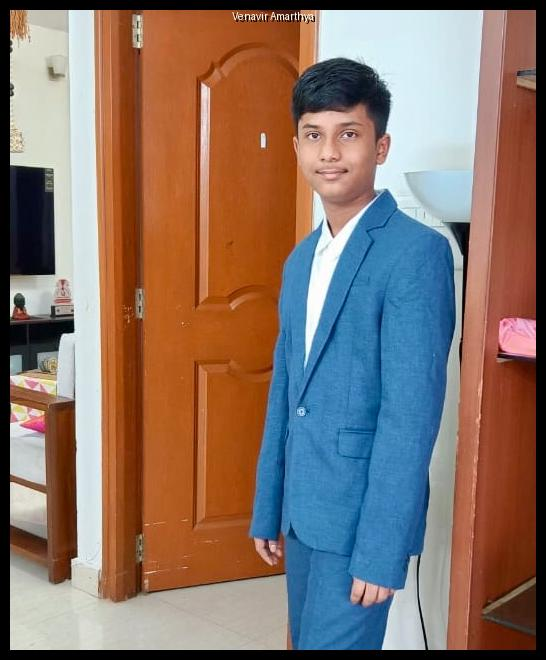

Riteesh Reddy:


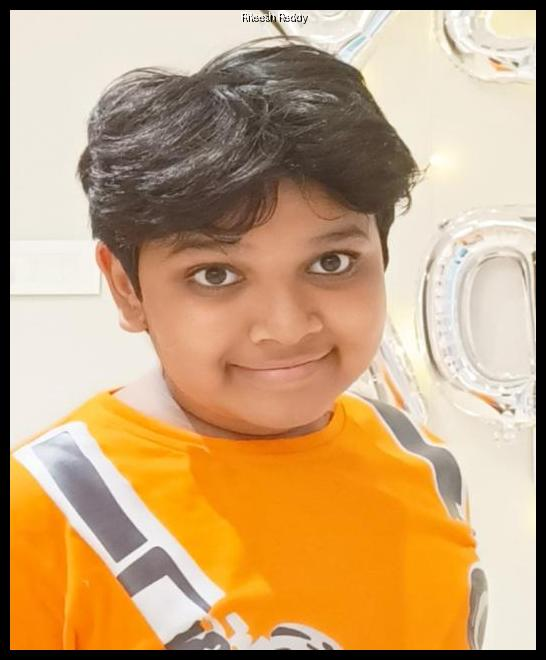


Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 1

List of all stores:
Name: Apple Store, Category: Electronics, Location: 1st Floor
Name: Zara, Category: Clothing, Location: 2nd Floor
Name: Starbucks, Category: Food, Location: Ground Floor
Name: Nike, Category: Clothing, Location: 1st Floor
Name: Zudio, Category: Footwear, Location: 4th Floor

Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 2
Enter store name (or press enter to skip): apple
Enter store category (or press enter to skip): 
Enter store location (or press enter to skip): 

Search results:
Name: Apple Store, Category: Electronics, Location: 1st Floor

Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 3
Enter new store name: WESTSIDE
Enter store category: Clothing
Enter store loca

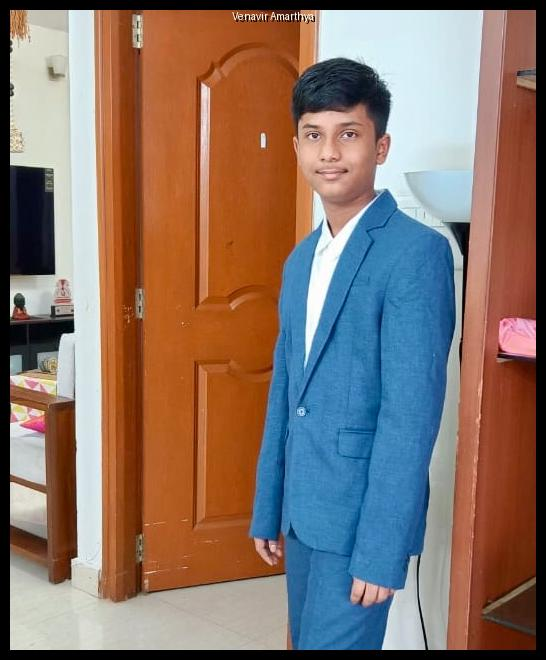

Riteesh Reddy:


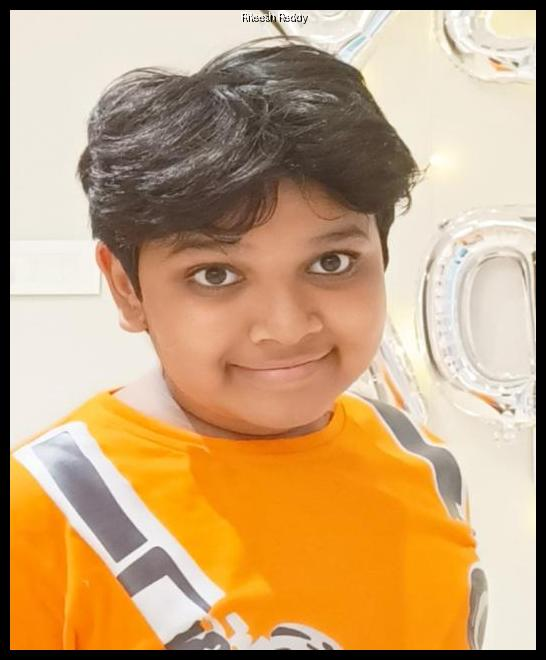


Mall Store Finder
1. Display all stores
2. Search for a store
3. Add a new store
4. Show Founders
5. Exit

Choose an option (1-5): 5
Exiting the program.


In [ ]:
from google.colab import drive
from IPython.display import Image, display
import os
from PIL import Image as PILImage, ImageOps, ImageDraw, ImageFont

# Mount Google Drive
drive.mount('/content/drive')

# List of stores (example data)
stores = [
    {"name": "Apple Store", "category": "Electronics", "location": "1st Floor"},
    {"name": "Zara", "category": "Clothing", "location": "2nd Floor"},
    {"name": "Starbucks", "category": "Food", "location": "Ground Floor"},
    {"name": "Nike", "category": "Clothing", "location": "1st Floor"},
]

# Function to display all stores
def display_all_stores():
    """Displays all stores in the system."""
    if not stores:
        print("No stores available.")
        return

    print("\nList of all stores:")
    for store in stores:
        print(f"Name: {store['name']}, Category: {store['category']}, Location: {store['location']}")

# Function to search for a store by name, category, or location
def search_store(name=None, category=None, location=None):
    results = []
    for store in stores:
        if name and name.lower() in store["name"].lower():
            results.append(store)
        elif category and category.lower() in store["category"].lower():
            results.append(store)
        elif location and location.lower() in store["location"].lower():
            results.append(store)

    if results:
        print("\nSearch results:")
        for store in results:
            print(f"Name: {store['name']}, Category: {store['category']}, Location: {store['location']}")
    else:
        print("\nNo stores found matching the criteria.")

# Function to add a new store
def add_store(name, category, location):
    new_store = {"name": name, "category": category, "location": location}
    stores.append(new_store)
    print(f"\nNew store added: {new_store['name']}")

# Function to display founders with images from Google Drive and add a border + text
def show_founders():
    # Set the path to your Google Drive directory
    image_directory = "/content/drive/MyDrive/founder_images"  # Replace with the correct path

    # Founder information
    founder_names = ["Venavir Amarthya", "Riteesh Reddy"]
    image_files = ["founder1.jpeg", "founder3.jpeg"]

    print("\nFounders:")
    for i, name in enumerate(founder_names):
        image_path = os.path.join(image_directory, image_files[i])

        if os.path.isfile(image_path):
            print(f"{name}:")

            try:
                # Open the image and add a border
                img = PILImage.open(image_path)
                bordered_img = ImageOps.expand(img, border=10, fill='black')

                # Add the founder name to the image
                draw = ImageDraw.Draw(bordered_img)

                # Load a font (use TTF font if available, else fallback to default)
                try:
                    font = ImageFont.truetype("arial.ttf", 40)  # Large font size
                except:
                    font = ImageFont.load_default()

                # Calculate text position (centered horizontally)
                text_bbox = draw.textbbox((0, 0), name, font=font)  # Bounding box for text
                text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
                text_x = (bordered_img.width - text_width) / 2
                text_y = 10  # Margin from the top

                # Add text with a shadow effect for better visibility
                shadow_color = "black"
                draw.text((text_x + 2, text_y + 2), name, font=font, fill=shadow_color)  # Shadow
                draw.text((text_x, text_y), name, font=font, fill="white")  # Main text

                # Save the modified image temporarily
                bordered_image_path = f"/tmp/bordered_image_{i}.jpeg"
                bordered_img.save(bordered_image_path)

                # Display the image with the name
                display(Image(bordered_image_path))

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
        else:
            print(f"{name} - Image not found: {image_path}")

# Main program loop
def main():
    while True:
        print("\nMall Store Finder")
        print("1. Display all stores")
        print("2. Search for a store")
        print("3. Add a new store")
        print("4. Show Founders")
        print("5. Exit")

        choice = input("\nChoose an option (1-5): ")

        if choice == "1":
            display_all_stores()

        elif choice == "2":
            name = input("Enter store name (or press enter to skip): ")
            category = input("Enter store category (or press enter to skip): ")
            location = input("Enter store location (or press enter to skip): ")
            search_store(name=name, category=category, location=location)

        elif choice == "3":
            name = input("Enter new store name: ")
            category = input("Enter store category: ")
            location = input("Enter store location: ")
            add_store(name, category, location)

        elif choice == "4":
            show_founders()  # Show founders with images and borders

        elif choice == "5":
            print("Exiting the program.")
            break

        else:
            print("Invalid option, please choose again.")

# Run the program
if __name__ == "__main__":
    main()
